# Load the relabeled calsses, pcs and v_exp of the climo data

In [1]:
import xarray as xr
import numpy as np

data_dir = 'D:/VScode/Last_deglaciation/climo_ana_data'
ds_sat = xr.open_dataset(data_dir + '/ds_GMM_climo_relabeled.nc')

# load relabeled_weighted_avg.pkl
import pickle
with open(data_dir + '/relabeled_weighted_avg.pkl', 'rb') as f:
    relabeled_weighted_avg = pickle.load(f)

# Load the weighted average from the ensemble data

In [2]:
# read the all_weighted_avg_curves
import pickle
with open('ens_ana_data/all_weighted_avg_curves.pkl', 'rb') as f:
    all_weighted_avg_curves = pickle.load(f)

# Calculate the warming rate between 20900 to 18000

In [35]:
import numpy as np
from scipy import stats


# Age vector for the independent variable in the linear regression
age_vector = np.array([18100., 18300., 18500., 18700., 18900., 19100., 19300., 19500.,
                       19700., 19900., 20100., 20300., 20500., 20700., 20900.], dtype=float)


weighted_avg_curves_k0 = [curves[0] for curves in all_weighted_avg_curves if 0 in curves]
weighted_avg_curves_k0_median=np.median(weighted_avg_curves_k0,axis=0)
weighted_avg_curves_k0_median = weighted_avg_curves_k0_median[35:50]

slope_k0, intercept, r_value, p_value_k0, std_err = stats.linregress(age_vector/-1000, weighted_avg_curves_k0_median)

print('slope = {:.2f}'.format(slope_k0))
print('p_value = {:.5f}'.format(p_value_k0))

# Initialize a list to store the slopes
slopes = []
p_values=[]

# Loop through the data and calculate the slopes
for array in weighted_avg_curves_k0:
    temp_data = array[35:50]

    # Check if the length of temp_data matches the age_vector
    if len(temp_data) == len(age_vector):
        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(age_vector, temp_data)
        slopes.append(slope)
        p_values.append(p_value)

# slope need to times 1000
slopes = np.array(slopes) * -1000
# Calculate the mean slope and the 95% confidence interval
mean_slope = np.mean(slopes)
std_error = np.std(slopes, ddof=1) / np.sqrt(len(slopes))
confidence_interval = stats.norm.interval(0.95, loc=mean_slope, scale=std_error)


print('95% confidence interval of slope = {:.2f} to {:.2f}'.format(confidence_interval[0], confidence_interval[1]))


slope = 0.29
p_value = 0.00000
95% confidence interval of slope = 0.27 to 0.31


\Progress:100.0% done[==============================================================]
pospr_diff_max_index: 13
cps [15. 25. 30. 37. 45.]
selected_cp_index: 0
age_5th=20500, age_95th=21900
|Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [16. 23. 34. 41. 49.]
selected_cp_index: 2
age_5th=16500, age_95th=17700
/Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [14. 30. 35. 51.]
selected_cp_index: 2
age_5th=16500, age_95th=17500
-Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [16. 26. 35.]
selected_cp_index: 2
age_5th=16500, age_95th=17500


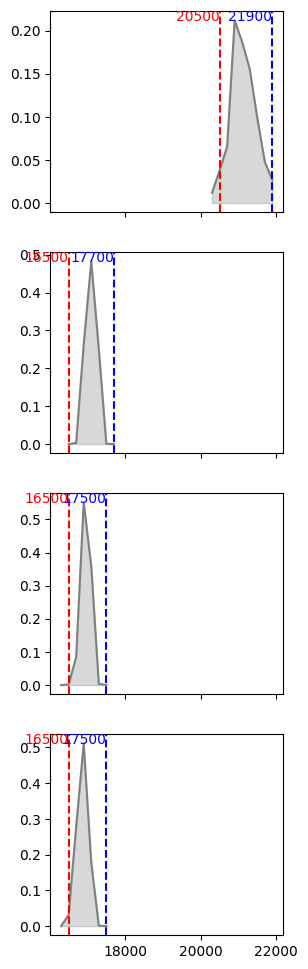

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from toolbox import change_point_functions as cpf
from matplotlib.colors import ListedColormap

# Create a figure with 4 rows and 1 column
fig, axs = plt.subplots(4, 1, figsize=(3, 12),dpi=100,sharex=True)
# cmap = plt.get_cmap('Accent', 4)


left_width_all=[800,800,800,800]
right_width_all=[1100,800,800,800]


for i in range(4):


    weighted_avg_curves_k = [curves[i] for curves in all_weighted_avg_curves if i in curves]

    # calculate the 5th, 25th, 75th and 95th percentile of the weighted_avg_curves_k
    weighted_avg_curves_k_5th=np.percentile(weighted_avg_curves_k,5,axis=0)
    weighted_avg_curves_k_25th=np.percentile(weighted_avg_curves_k,25,axis=0)
    weighted_avg_curves_k_75th=np.percentile(weighted_avg_curves_k,75,axis=0)
    weighted_avg_curves_k_95th=np.percentile(weighted_avg_curves_k,95,axis=0)

    # calculate the median of the weighted_avg_curves_k
    weighted_avg_curves_k_median=np.median(weighted_avg_curves_k,axis=0)

    # Calculate the cp_info for each dataset
    cp_info = cpf.find_cp(weighted_avg_curves_k_median, ds_sat['age'], rb_plot=False)
    
    # Extract data for plotting from cp_info
    data_flipped = cp_info['data_flipped']
    cpOccPr = cp_info['cpOccPr']
    slpSgnPosPr = cp_info['slpSgnPosPr']
    age = cp_info['age']
    cp_age = cp_info['cp_age']

    left_width=left_width_all[i]
    right_width=right_width_all[i]
    t_cutoff_left=cp_age-left_width
    t_cutoff_right=cp_age+right_width


    age_subset = age[(age > t_cutoff_left) & (age < t_cutoff_right)]
    cpOccPr_subset = cpOccPr[(age > t_cutoff_left) & (age < t_cutoff_right)]

    # # Get the current axis
    # ax= axs[i]
    # ax.plot(age_subset, cpOccPr_subset, 'grey', label='cpOccPr')
    # # fill the area bewteen cpOccPr_subset and max ylim with light purple
    # ax.fill_between(age_subset, cpOccPr_subset, 0, color='grey', alpha=0.3)
    # # invert x axis
    # ax.invert_xaxis()

    p_5th=np.percentile(cpOccPr_subset, 5)
    # find the first age where the cpOccPr_subset is less than 5th percentile
    age_5th=age_subset[cpOccPr_subset>=p_5th][0]
    # find the last age where the cpOccPr_subset is less than 5th percentile
    age_95th=age_subset[cpOccPr_subset>=p_5th][-1]

    ax = axs[i]
    ax.plot(age_subset, cpOccPr_subset, 'grey', label='cpOccPr')
    ax.fill_between(age_subset, cpOccPr_subset, 0, color='grey', alpha=0.3)
    ax.invert_xaxis()

    # Label the 5% and 95% quantile points on the plot
    ax.axvline(x=age_5th, color='r', linestyle='--', label='5% Quantile')
    ax.axvline(x=age_95th, color='b', linestyle='--', label='95% Quantile')
    ax.text(age_5th, ax.get_ylim()[1]*0.95, f'{age_5th:.0f}', color='r', horizontalalignment='right')
    ax.text(age_95th, ax.get_ylim()[1]*0.95, f'{age_95th:.0f}', color='b', horizontalalignment='right')
    print(f'age_5th={age_5th:.0f}, age_95th={age_95th:.0f}')
    


In [16]:
cpOccPr_subset>=p_5th

array([False,  True,  True,  True,  True,  True,  True])

# Find change points and plot

-Progress:100.0% done[==============================================================]
pospr_diff_max_index: 13
cps [15. 25. 32. 37. 45.]
selected_cp_index: 0


C:\Users\zps19\AppData\Local\Temp\ipykernel_10064\1457646969.py:138: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  age_text=str(np.int(cp_age.values))


\Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [16. 23. 34. 41. 49.]
selected_cp_index: 2
|Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [14. 30. 35. 51.]
selected_cp_index: 2
/Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [17. 27. 35. 43.]
selected_cp_index: 2


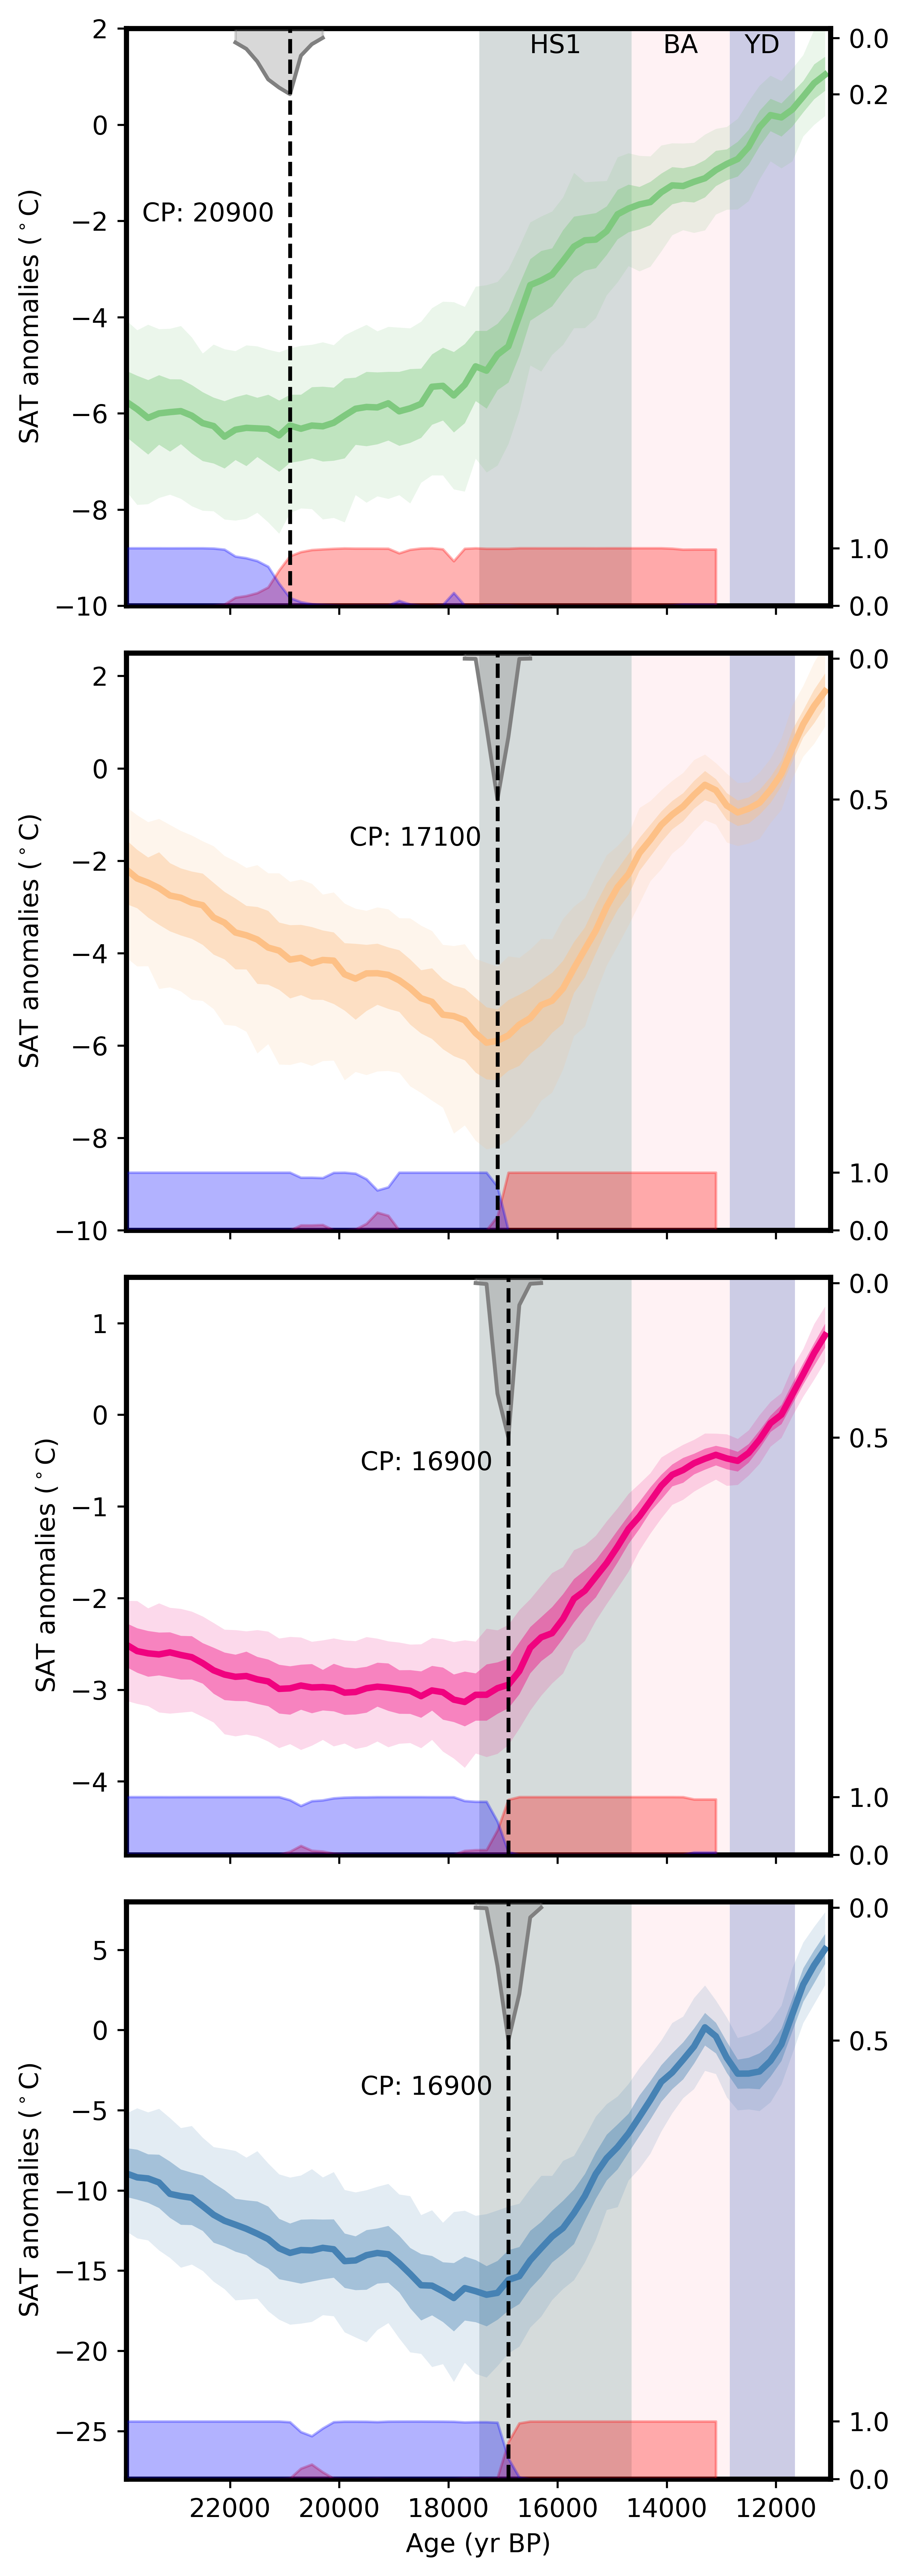

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from toolbox import change_point_functions as cpf
from matplotlib.colors import ListedColormap

# Create a figure with 4 rows and 1 column
fig, axs = plt.subplots(4, 1, figsize=(5, 14),dpi=600,sharex=True)
# cmap = plt.get_cmap('Accent', 4)

if len(all_weighted_avg_curves[0]) <= 4:
    custom_colors = [
    (0.4980392156862745, 0.788235294117647, 0.4980392156862745),
    (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
    (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
    (0.27450980392156865, 0.5098039215686274, 0.7058823529411765),]

    # Create a ListedColormap object with your custom colors
    cmap = ListedColormap(custom_colors)   
else:
    cmap = plt.get_cmap('Accent', len(all_weighted_avg_curves[0]))


left_width_all=[800,800,800,800]
right_width_all=[1100,800,800,800]

# Add climate transitions timing
HS1 = np.array([17480, 14692]) - 50  # convert to b1950
BA = np.array([14692, 12896]) - 50
YD = np.array([12896, 11703]) - 50

ylims=[[-10,2],[-10,2.5],[-4.8,1.5],[-28,8]]

# Loop through the range 0 to 3
for i in range(4):

    
    # Get the current axis
    ax1 = axs[i]


    weighted_avg_curves_k = [curves[i] for curves in all_weighted_avg_curves if i in curves]

    # calculate the 5th, 25th, 75th and 95th percentile of the weighted_avg_curves_k
    weighted_avg_curves_k_5th=np.percentile(weighted_avg_curves_k,5,axis=0)
    weighted_avg_curves_k_25th=np.percentile(weighted_avg_curves_k,25,axis=0)
    weighted_avg_curves_k_75th=np.percentile(weighted_avg_curves_k,75,axis=0)
    weighted_avg_curves_k_95th=np.percentile(weighted_avg_curves_k,95,axis=0)

    # calculate the median of the weighted_avg_curves_k
    weighted_avg_curves_k_median=np.median(weighted_avg_curves_k,axis=0)

    # Calculate the cp_info for each dataset
    cp_info = cpf.find_cp(weighted_avg_curves_k_median, ds_sat['age'], rb_plot=False)
    
    # Extract data for plotting from cp_info
    data_flipped = cp_info['data_flipped']
    cpOccPr = cp_info['cpOccPr']
    slpSgnPosPr = cp_info['slpSgnPosPr']
    age = cp_info['age']
    cp_age = cp_info['cp_age']


    ax1.set_ylim(ylims[i])

    # Plot grey bars for HS1, BA, and YD periods
    ax1.axvspan(HS1[1], HS1[0], color='darkslategray', alpha=0.2, lw=0)
    ax1.axvspan(BA[1], BA[0], color='pink', alpha=0.2, lw=0)
    ax1.axvspan(YD[1], YD[0], color='navy', alpha=0.2, lw=0)

    if i==0:
        ax1.text(x=np.mean(HS1), y=0.95 * np.max(ax1.get_ylim()), s='HS1', ha='center', va='top')
        ax1.text(x=np.mean(BA), y=0.95 * np.max(ax1.get_ylim()), s='BA', ha='center', va='top')
        ax1.text(x=np.mean(YD), y=0.95 * np.max(ax1.get_ylim()), s='YD', ha='center', va='top')


    # fill the area betwen 5th and 95th percentile with light grey with alpha=0.3, hide the line
    ax1.fill_between(ds_sat['age'].values,weighted_avg_curves_k_5th,weighted_avg_curves_k_95th,color=cmap(i),alpha=0.15,linewidth=0)

    # fill the area between 25th and 75th percentile with light blue with alpha=0.5
    ax1.fill_between(ds_sat['age'].values,weighted_avg_curves_k_25th,weighted_avg_curves_k_75th,color=cmap(i),alpha=0.4,linewidth=0)



    ax1.plot(ds_sat['age'], weighted_avg_curves_k_median, color=cmap(i),linewidth=2.5)
    if i==3:
        ax1.set_xlabel('Age (yr BP)')
    # set x-axis limits
    ax1.set_xlim([11000,23900])


    # invert the x-axis
    ax1.invert_xaxis()
    # Make the y-axis label and tick labels match the line color.
    ax1.set_ylabel('SAT anomalies ($^\circ$C)', color='k')
    
    ax1.spines['left'].set_linewidth(2)
    ax1.spines['bottom'].set_linewidth(2)
    ax1.spines['right'].set_linewidth(2)
    ax1.spines['top'].set_linewidth(2)





    # Create a twin axis
    ax2 = ax1.twinx()
    # set the y-axis limits
    ax2.set_ylim([0, 10])
    # get the ylim
    ylim = ax2.get_ylim()

    # fill the areas under slpSgnPosPr and 1-slpSgnPosPr to light red and light blue respectively
    ax2.fill_between(age, slpSgnPosPr, color='r', alpha=0.3)
    ax2.fill_between(age, 1 - slpSgnPosPr, color='b', alpha=0.3)

    left_width=left_width_all[i]
    right_width=right_width_all[i]
    t_cutoff_left=cp_age-left_width
    t_cutoff_right=cp_age+right_width


    # Subset the age and cpOccPr arrays
    age_subset = age[(age > t_cutoff_left) & (age < t_cutoff_right)]
    cpOccPr_subset = cpOccPr[(age > t_cutoff_left) & (age < t_cutoff_right)]
    scaled_cpOccPr_subset = (np.max(ylim)-cpOccPr_subset*5)-0.1
    ax2.plot(age_subset, scaled_cpOccPr_subset, 'grey', label='cpOccPr')
    # fill the area bewteen cpOccPr_subset and max ylim with light purple
    ax2.fill_between(age_subset, scaled_cpOccPr_subset, np.max(ylim), color='grey', alpha=0.3)

    # set y ticks
    ax2.set_yticks([0, 1, np.min(scaled_cpOccPr_subset),np.max(scaled_cpOccPr_subset)])
    #  set y tick labels
    ax2.set_yticklabels(['0.0', '1.0', str(np.round(np.max(cpOccPr_subset),1)), str(np.round(np.min(cpOccPr_subset),1))])

    # plot a vertical line at cp_age
    ax2.axvline(x=cp_age, color='k', linestyle='--')
    # add text to show the cp_age
    age_text=str(np.int(cp_age.values))
    ax2.text(x=cp_age.values+1500, y=0.7 * np.max(ax2.get_ylim()), s='CP: '+age_text, ha='center', va='top')


    
    # Adjust layout
    plt.tight_layout()

# Display the figure
plt.show()


In [20]:
output_path = 'D:/VScode/Last_deglaciation/fig_exp_temp/'
fig.savefig(output_path+'/cps.svg', format='svg', dpi=600)